In [1]:
# Humble beginnings, training the model to noise and denoise with single image

import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import os

def load_image(path):
    image = cv2.imread(path)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

def add_noise(image):
    noise = np.random.normal(loc=0, scale=0.1, size=image.shape).astype('float32')  # Adjust the scale for noise
    noisy = image + noise  # Directly add noise to the image
    noisy = np.clip(noisy, 0.0, 1.0)  # Ensure the values are between 0 and 1
    return noisy

def build_denoising_model(input_shape):
    model = keras.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(3, (3, 3), padding='same')
    ])
    return model

def train_model(model, noisy, clean, epochs=50, batch_size=32):
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(noisy, clean, epochs=epochs, batch_size=batch_size, validation_split=0.0)

def save_image(image, path):
    cv2.imwrite(path, (image * 255).astype('uint8'))

def process_single_image(image_path, output_folder, model):
    os.makedirs(output_folder, exist_ok=True)
    og = load_image(image_path)
    og = cv2.resize(og, (256, 256)).astype('float32') / 255.0  # Normalize to [0, 1]
    noisy = add_noise(og)  # Add noise

    # Train the model with multiple images (here we use only one for demonstration)
    noisy_images = np.array([noisy])  # Array of noisy images
    clean_images = np.array([og])      # Array of clean images

    # Train the model
    train_model(model, noisy_images, clean_images, epochs=100)

    # Denoise the image
    denoised = model.predict(noisy[np.newaxis, ...])[0]

    # Save images
    save_image(og, os.path.join(output_folder, 'original_image.png'))
    save_image(noisy, os.path.join(output_folder, 'noisy_image.png'))
    save_image(denoised, os.path.join(output_folder, 'denoised_image.png'))

    print(f"Images saved in folder: {output_folder}")

def main():
    image_path = input("Enter the path to the image file: ")
    output_folder = input("Enter the output folder path: ")
    print(f"Using image file: '{image_path}'")
    
    model = build_denoising_model((256, 256, 3))  # Initialize model
    
    process_single_image(image_path, output_folder, model)

if __name__ == "__main__":
    main()


2024-10-20 11:04:52.916857: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Enter the path to the image file:  balloons_noisy.png
Enter the output folder path:  results


Using image file: 'balloons_noisy.png'
Epoch 1/100


2024-10-20 11:05:27.599505: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-10-20 11:05:27.614512: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-10-20 11:05:27.615043: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-10-20 11:05:27.615877: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate 

1/1 [==============================] - 1s 544ms/step - loss: 0.2185
Epoch 2/100
1/1 [==============================] - 0s 66ms/step - loss: 0.1285
Epoch 3/100
1/1 [==============================] - 0s 29ms/step - loss: 0.0698
Epoch 4/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0459
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 0.0625
Epoch 6/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0733
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 0.0633
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0497
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0424
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0417
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0441
Epoch 12/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0466
Epoch 13/100
1/1 [==============================] - 0s 5ms/step - 

In [6]:
# Training the model on bnw images

import cv2
import numpy as np
import os
from tensorflow import keras
from tensorflow.keras import layers

# Load and preprocess image
def load_image(path):
    image = cv2.imread(path)  # Load the image (BGR format)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Add Gaussian noise to the image
def add_noise(image):
    noise = np.random.normal(loc=0, scale=0.1, size=image.shape).astype('float32')  # Add noise
    noisy = image + noise  # Add noise to image
    noisy = np.clip(noisy, 0.0, 1.0)  # Ensure values are between 0 and 1
    return noisy

# Save image to disk
def save_image(image, path):
    # Save the image after converting from [0, 1] to [0, 255] range
    cv2.imwrite(path, (image * 255).astype('uint8'))

# Load dataset from a directory and generate noisy images
def load_dataset(image_directory):
    clean_images = []
    noisy_images = []
    
    for filename in os.listdir(image_directory):
        if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
            img = load_image(os.path.join(image_directory, filename))
            img = cv2.resize(img, (256, 256)).astype('float32') / 255.0  # Normalize to [0, 1]
            clean_images.append(img)
            noisy_images.append(add_noise(img))  # Add noise to image
    
    return np.array(clean_images), np.array(noisy_images)

# Build a simple convolutional denoising model
def build_denoising_model(input_shape):
    model = keras.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(3, (3, 3), padding='same')  # Output layer
    ])
    return model

# Train the model
def train_model(model, noisy_images, clean_images, epochs=100, batch_size=16):
    model.compile(optimizer='adam', loss='mean_squared_error')  # Compile with MSE loss
    model.fit(noisy_images, clean_images, epochs=epochs, batch_size=batch_size, validation_split=0.1)  # Train the model

# Main execution
def main():
    # Ask for user inputs
    image_directory = input("Enter the path to the image directory: ")
    output_folder = input("Enter the output folder path: ")
    print(f"Using image directory: '{image_directory}'")

    # Load dataset
    clean_images, noisy_images = load_dataset(image_directory)

    # Build and train the model
    model = build_denoising_model((256, 256, 3))
    train_model(model, noisy_images, clean_images, epochs=100, batch_size=16)  # Adjust epochs and batch size as needed

    # Save the model after training
    model.save(os.path.join(output_folder, 'denoising_model.h5'))
    print(f"Model saved in folder: {output_folder}")

if __name__ == "__main__":
    main()


Enter the path to the image directory:  images
Enter the output folder path:  results


Using image directory: 'images'


Corrupt JPEG data: 1028887 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1021232 extraneous bytes before marker 0xd9
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature 

Epoch 1/100
26/26 [==============================] - 1s 35ms/step - loss: 0.0312 - val_loss: 0.0061
Epoch 2/100
26/26 [==============================] - 1s 30ms/step - loss: 0.0059 - val_loss: 0.0034
Epoch 3/100
26/26 [==============================] - 1s 31ms/step - loss: 0.0034 - val_loss: 0.0026
Epoch 4/100
26/26 [==============================] - 1s 30ms/step - loss: 0.0029 - val_loss: 0.0023
Epoch 5/100
26/26 [==============================] - 1s 30ms/step - loss: 0.0026 - val_loss: 0.0021
Epoch 6/100
26/26 [==============================] - 1s 30ms/step - loss: 0.0024 - val_loss: 0.0020
Epoch 7/100
26/26 [==============================] - 1s 30ms/step - loss: 0.0023 - val_loss: 0.0020
Epoch 8/100
26/26 [==============================] - 1s 30ms/step - loss: 0.0022 - val_loss: 0.0019
Epoch 9/100
26/26 [==============================] - 1s 30ms/step - loss: 0.0022 - val_loss: 0.0019
Epoch 10/100
26/26 [==============================] - 1s 30ms/step - loss: 0.0021 - val_loss: 0.0019

In [7]:
# Use the model on a single image
"""import cv2
import numpy as np
from tensorflow import keras
import os

def load_image(path):
    image = cv2.imread(path)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

def add_noise(image):
    noise = np.random.normal(loc=0, scale=0.1, size=image.shape).astype('float32')
    noisy = image + noise
    noisy = np.clip(noisy, 0.0, 1.0)  # Ensure values are between 0 and 1
    return noisy

def save_image(image, path):
    cv2.imwrite(path, (image * 255).astype('uint8'))

def denoise_image(model, image_path, output_folder):
    os.makedirs(output_folder, exist_ok=True)
    
    # Load and preprocess the image
    original_image = load_image(image_path)
    original_image = cv2.resize(original_image, (256, 256)).astype('float32') / 255.0  # Normalize

    # Add noise to the image
    noisy_image = add_noise(original_image)

    # Denoise using the trained model
    denoised_image = model.predict(noisy_image[np.newaxis, ...])[0]

    # Save the images
    save_image(original_image, os.path.join(output_folder, 'original_image.png'))
    save_image(noisy_image, os.path.join(output_folder, 'noisy_image.png'))
    save_image(denoised_image, os.path.join(output_folder, 'denoised_image.png'))

    print(f"Images saved in folder: {output_folder}")
    return denoised_image

def main():
    model_path = input("Enter the path to the trained model (denoising_model.h5): ")
    image_path = input("Enter the path to the image file to denoise: ")
    output_folder = input("Enter the output folder path: ")

    # Load the trained model
    model = keras.models.load_model(model_path)

    # Denoise the image
    denoise_image(model, image_path, output_folder)

if __name__ == "__main__":
    main()
"""

Enter the path to the trained model (denoising_model.h5):  denoising_model.h5
Enter the path to the image file to denoise:  balloons_noisy.png
Enter the output folder path:  results2


1/1 [==============================] - 0s 60ms/step
Images saved in folder: results2


In [10]:
# Use the model only on a noisy image, produce denoised image

import cv2
import numpy as np
import os
from tensorflow import keras

def load_image(path):
    return cv2.imread(path)

def save_image(image, path):
    cv2.imwrite(path, (image * 255).astype('uint8'))

def process_single_image(image_path, output_folder, model):
    os.makedirs(output_folder, exist_ok=True)
    
    # Load and preprocess the noisy image
    noisy_image = load_image(image_path)
    noisy_image = cv2.resize(noisy_image, (256, 256))  # Resize to match model input
    noisy_image = noisy_image.astype('float32') / 255.0  # Normalize to [0, 1]
    
    # Predict the denoised image
    denoised_image = model.predict(noisy_image[np.newaxis, ...])[0]  # Add batch dimension

    # Save the images
    save_image(noisy_image, os.path.join(output_folder, 'noisy_image.png'))
    save_image(denoised_image, os.path.join(output_folder, 'denoised_image.png'))
    print(f"Images saved in folder: {output_folder}")

def main():
    image_path = input("Enter the path to the noisy image file: ")
    output_folder = input("Enter the output folder path: ")
    print(f"Using noisy image file: '{image_path}'")
    
    # Load your trained denoising model
    model = keras.models.load_model('denoising_model.h5')
    
    # Process and save the results
    process_single_image(image_path, output_folder, model)

if __name__ == "__main__":
    main()


Enter the path to the noisy image file:  images.jpg
Enter the output folder path:  results_withmodel


Using noisy image file: 'images.jpg'
1/1 [==============================] - 0s 40ms/step
Images saved in folder: results_withmodel


1/1 [==============================] - 0s 35ms/step


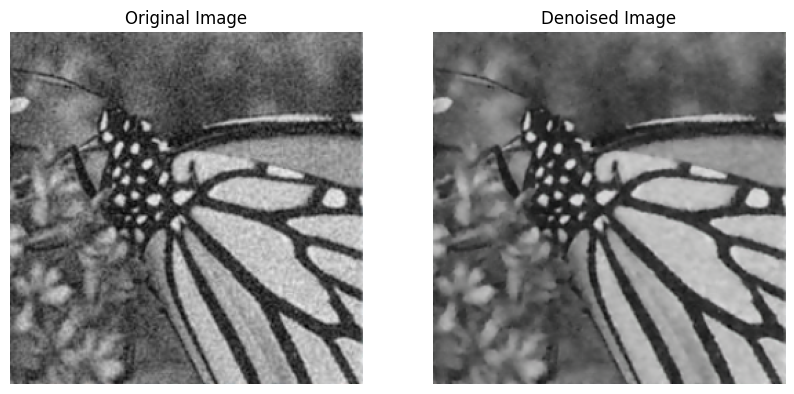

In [12]:
# Display model outputs

import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow import keras

def load_image(image_path):
    return cv2.imread(image_path)  # Read the image using OpenCV

def denoise_image(image_path, model):
    # Load and preprocess the noisy image
    noisy_image = load_image(image_path)
    noisy_image = cv2.resize(noisy_image, (256, 256))  # Resize to match model input
    noisy_image = noisy_image.astype('float32') / 255.0  # Normalize to [0, 1]
    
    # Predict the denoised image
    denoised_image = model.predict(noisy_image[np.newaxis, ...])[0]  # Add batch dimension

    return denoised_image, noisy_image

# Load your trained denoising model
model = keras.models.load_model('denoising_model.h5')
image_path = "images.jpg"

# Process and save the results
denoised_img, original_img = denoise_image(image_path, model)

# Convert BGR to RGB for both images
original_img_rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
denoised_img_rgb = cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB)

# Display the original and denoised images side by side
plt.figure(figsize=(10, 5))

# Show original image
plt.subplot(1, 2, 1)
plt.imshow(original_img_rgb)
plt.title('Original Image')
plt.axis('off')

# Show denoised image
plt.subplot(1, 2, 2)
plt.imshow(denoised_img_rgb)
plt.title('Denoised Image')
plt.axis('off')

plt.show()
